In [2]:
# todo еще раз проверить корректность используемых терминов, уточнить этапы
# todo убрать английский

### Exploratory Data Analysis / Разведывательный анализ данных

На этом этапе:
1. Получение базовой информации  о датасете
2. Построение распределений числовых признаков
3. Простроение распеделений категориальных признаков
4. Сигментация
5. Корреляции
Distributions of numeric features
Distributions of categorical features
Segmentations
Correlations

In [1]:
import sqlite3
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import missingno as msno

In [2]:
conn = sqlite3.connect('db\cian_362_150.db') 
          
df = pd.read_sql_query ('''
                               SELECT
                               flat_type, rooms, price, sale_type, mortgage, area,
                       living_area, kitchen_area, floor, floors, built_year, address, district, metro_station, seller,
                       housing_type, planning, ceiling_height, bathroom, balcony_loggia, repair, view,
                       finished_shell_condition, house_type, house_class, building_number, parking, elevators,
                       housing_line, floor_type, entrance_number, heating, unsafe_house, garbage_disposal, gas_supply,
                       description_text
                               FROM ad_data
                               ''', conn)


1. Получение базовой информации о датасете

In [3]:
# размерность таблицы
df.shape

(149, 36)

In [4]:
# типы данных столбцов
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   flat_type                 149 non-null    object 
 1   rooms                     149 non-null    int64  
 2   price                     149 non-null    int64  
 3   sale_type                 146 non-null    object 
 4   mortgage                  149 non-null    int64  
 5   area                      149 non-null    float64
 6   living_area               102 non-null    float64
 7   kitchen_area              91 non-null     float64
 8   floor                     149 non-null    int64  
 9   floors                    149 non-null    int64  
 10  built_year                143 non-null    float64
 11  address                   149 non-null    object 
 12  district                  149 non-null    object 
 13  metro_station             147 non-null    object 
 14  seller    

Наблюдения характеризуются 37 признаками: числовыми и категориальными.
Фильтрация категориальный признаков:

In [5]:
print(df.dtypes[df.dtypes=='object'])
print(f"Всего {len(df.dtypes[df.dtypes=='object'])} категориальных признаков")

flat_type                   object
sale_type                   object
address                     object
district                    object
metro_station               object
seller                      object
housing_type                object
planning                    object
bathroom                    object
balcony_loggia              object
repair                      object
view                        object
finished_shell_condition    object
house_type                  object
house_class                 object
parking                     object
elevators                   object
housing_line                object
floor_type                  object
heating                     object
unsafe_house                object
garbage_disposal            object
gas_supply                  object
description_text            object
dtype: object
Всего 24 категориальных признаков


In [6]:
# первые 10 строк фрейма данных
df.head(10)

,flat_type,rooms,price,sale_type,mortgage,area,living_area,kitchen_area,floor,floors,...,parking,elevators,housing_line,floor_type,entrance_number,heating,unsafe_house,garbage_disposal,gas_supply,description_text
0,квартира,4,52116797,свободная продажа,0,118.14,NaN,NaN,4,18,...,None,None,None,None,NaN,None,None,None,None,Продаётся 4-комнатная квартира в сданном доме ...
1,апартаменты,2,67794300,долевое участие (214-фз),1,132.93,35.6,4.4,4,19,...,"подземная, гостевая",None,None,None,NaN,None,None,None,None,"Продаются 2-комн. апартаменты площадью 132,93 ..."
2,квартира,4,72500000,свободная продажа,0,149.00,NaN,NaN,3,18,...,подземная,20 всего,None,железобетонные,10.0,автономная котельная,нет,None,None,ЛОТ 24840 Д ОФИС ПРОДАЖ ЖК ДОМИНИОН. ПРЕДЛОЖЕН...
3,квартира,4,110000000,свободная продажа,0,185.00,150.0,20.0,9,16,...,подземная,"1 пасс., 1 груз.",None,железобетонные,12.0,автономная котельная,нет,None,None,ЛОТ 28408 Д ОФИС ПРОДАЖ ЖК ДОМИНИОН. ПРЕДЛОЖЕН...
4,апартаменты,4,32403725,долевое участие (214-фз),0,98.40,48.7,35.4,22,25,...,"подземная, гостевая",None,None,None,NaN,None,None,None,None,На живописной стрелке Москвы-реки и Сходни про...
5,квартира,4,78000000,свободная продажа,0,140.00,90.0,20.0,3,19,...,подземная,"1 пасс., 1 груз.",None,железобетонные,10.0,автономная котельная,нет,None,None,ЛОТ 28413 Д ОФИС ПРОДАЖ ЖК ДОМИНИОН. ПРЕДЛОЖЕН...
6,апартаменты,3,115000000,свободная продажа,1,146.00,NaN,NaN,6,10,...,None,есть,None,None,NaN,None,нет,None,None,К продаже предлагается апартамент с дорогостоя...
7,квартира,4,64350000,долевое участие (214-фз),1,123.11,70.4,12.3,17,20,...,"подземная, гостевая",None,None,None,NaN,None,None,None,None,О жилом комплексе. \nЖилой комплекс бизнес-кла...
8,квартира,4,47540480,долевое участие (214-фз),0,114.28,55.8,26.7,6,35,...,"подземная, гостевая",None,None,None,NaN,None,None,None,None,Продаётся 4-комнатная квартира в строящемся до...
9,квартира,3,32017074,долевое участие (214-фз),0,80.80,47.3,16.5,29,33,...,подземная,None,None,None,NaN,None,None,None,None,На набережной Москвы-реки продается 3-комнатна...


In [7]:
# последние 10 строк фрема данных
df.tail(10)

,flat_type,rooms,price,sale_type,mortgage,area,living_area,kitchen_area,floor,floors,...,parking,elevators,housing_line,floor_type,entrance_number,heating,unsafe_house,garbage_disposal,gas_supply,description_text
139,квартира,0,7950000,свободная продажа,0,19.4,NaN,NaN,2,9,...,None,есть,None,железобетонные,7.0,центральное,нет,есть,центральное,Продается полноценная красивая по своей планир...
140,квартира,4,40685840,долевое участие (214-фз),0,98.8,NaN,NaN,7,20,...,"подземная, гостевая",None,None,None,NaN,None,None,None,None,"Жилой квартал расположен в уникальном месте, н..."
141,квартира,4,20005887,долевое участие (214-фз),1,85.8,42.4,20.4,12,16,...,None,None,None,None,NaN,None,None,None,None,"1,01% - гибкая ипотека! Вы можете воспользоват..."
142,квартира,2,27900000,свободная продажа,1,58.0,NaN,NaN,24,24,...,подземная,"1 пасс., 1 груз.",индивидуальный проект,железобетонные,4.0,индивидуальный тепловой пункт,нет,None,None,Номер объекта 80755. \n\nПозволять себе лучшее...
143,апартаменты,0,12331977,долевое участие (214-фз),0,24.7,8.5,NaN,2,13,...,подземная,None,None,None,NaN,None,None,None,None,"Ипотека 0,1%! Студия, общей площадью 24,7 кв. ..."
144,квартира,-1,350000000,свободная продажа,1,257.0,NaN,NaN,8,9,...,None,None,None,None,NaN,None,нет,None,None,129422 ЖК Savvin River Residence\n\nПредлагает...
145,квартира,1,22625822,долевое участие (214-фз),1,35.9,NaN,NaN,9,41,...,"подземная, гостевая",None,None,None,NaN,None,None,None,None,Прямая продажа от застройщика.\n\nПродаётся 1-...
146,квартира,3,64131951,долевое участие (214-фз),1,101.4,73.6,NaN,39,41,...,"подземная, гостевая",None,None,None,NaN,None,None,None,None,Прямая продажа от застройщика.\n\nПродаётся 3-...
147,квартира,2,48207067,долевое участие (214-фз),1,79.2,54.8,NaN,40,41,...,"подземная, гостевая",None,None,None,NaN,None,None,None,None,Прямая продажа от застройщика.\n\nПродаётся 2-...
148,апартаменты,3,57999000,свободная продажа,1,100.4,NaN,NaN,9,25,...,подземная,"2 пасс., 2 груз.",None,None,NaN,None,нет,None,None,Номер объекта 81974. \n\nВ продаже апартамент ...


In [8]:
# проверка на наличие пропущенных значений для каждого столбца
print(df.isnull().any())

flat_type                   False
rooms                       False
price                       False
sale_type                    True
mortgage                    False
area                        False
living_area                  True
kitchen_area                 True
floor                       False
floors                      False
built_year                   True
address                     False
district                    False
metro_station                True
seller                      False
housing_type                False
planning                     True
ceiling_height               True
bathroom                     True
balcony_loggia               True
repair                       True
view                         True
finished_shell_condition     True
house_type                   True
house_class                  True
building_number              True
parking                      True
elevators                    True
housing_line                 True
floor_type    

<AxesSubplot:>

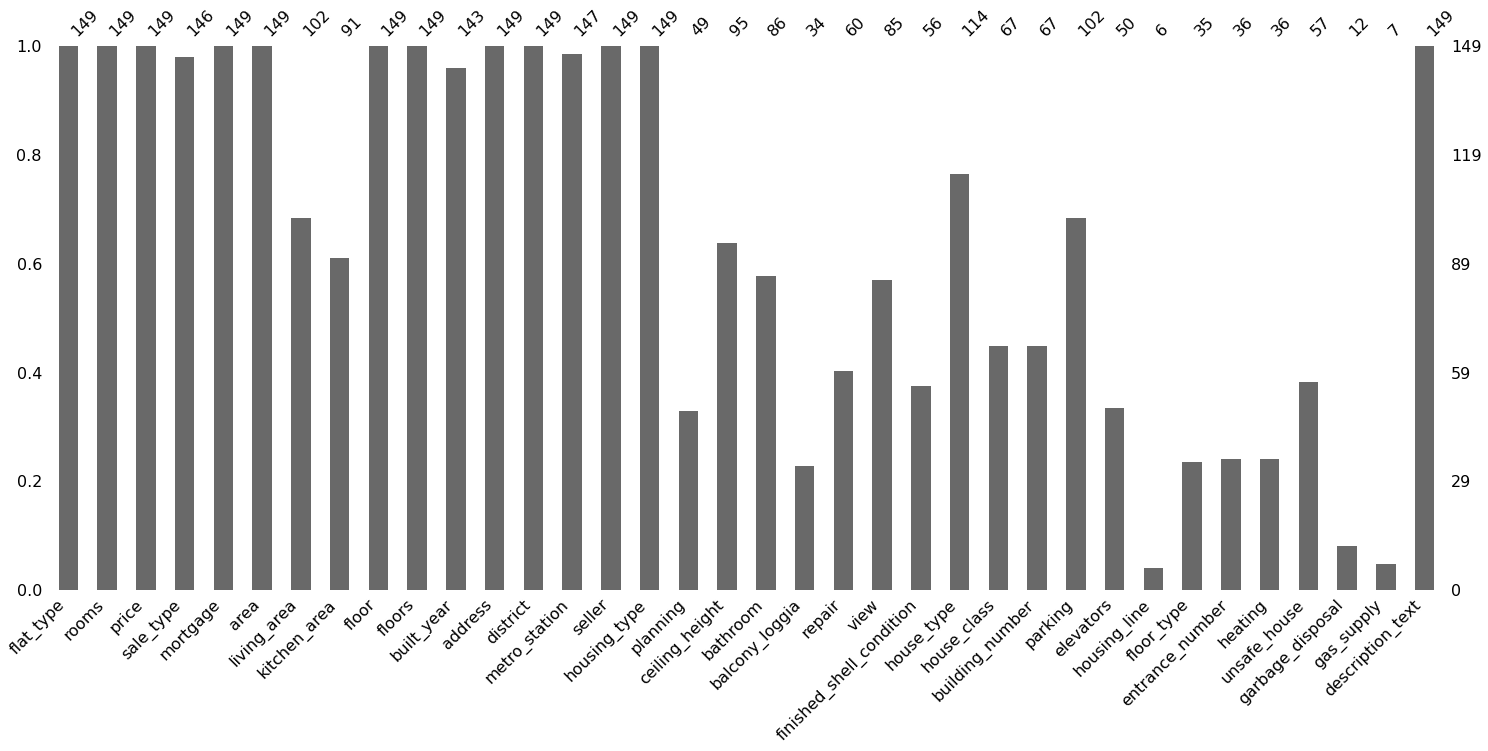

In [9]:
# гистограмма непропущенных значений для каждого столбца
msno.bar(df)

2. Построение распределений числовых признаков

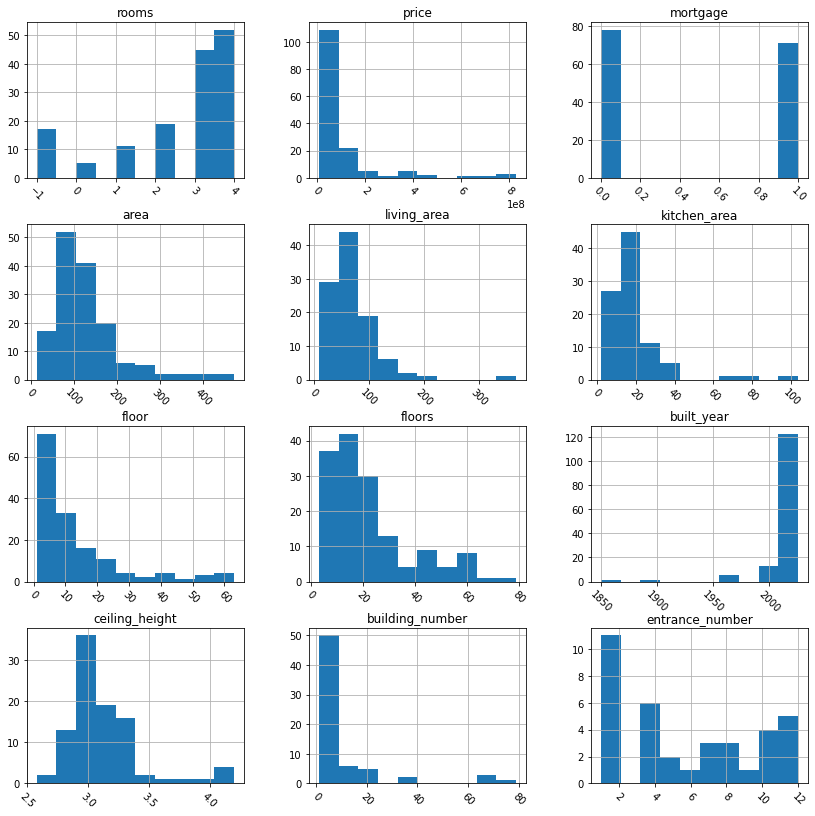

In [10]:
# гистограммы
df.hist(figsize=(14,14), xrot=-45)
plt.show()

todo написать аналогичный вывод
Observations: We can make out quite a few observations:

For example, consider the histogram for num_schools:

More than 1500 houses have 3 schools with a mile
Consider the histogram for sqft:

More than 400 houses have area within 2000 sqft
Very few houses have area more than 5000 sqft
Consider the histogram for beds:

Over 600 houses have 4 bedrooms, and similar number of houses have 3 bedrooms.
Less than 100 houses have one bedroom and so on.
Also, look at the plot for the 'year_built' feature:

The last bin in the histogram represents the range 2010-2020.
Since this dataset was pulled in 2016, we should not have properties built in 2019.
A property built after 2016 would be a measurement error.
However, because of the 10-year bins, it's hard to tell if there's a measurement error just from the plot above.

In [11]:
# описательная статистика для числовых столбцов
df.describe()

,rooms,price,mortgage,area,living_area,kitchen_area,floor,floors,built_year,ceiling_height,building_number,entrance_number
count,149.000000,1.490000e+02,149.000000,149.000000,102.000000,91.000000,149.000000,149.000000,143.000000,95.000000,67.000000,36.000000
mean,2.516779,1.030369e+08,0.476510,130.724161,69.165686,18.779121,12.563758,22.093960,2014.524476,3.124211,10.522388,5.777778
std,1.638242,1.472853e+08,0.501132,80.553194,46.215876,14.735765,13.660123,15.326775,21.301601,0.296539,17.046601,3.928730
min,-1.000000,7.250000e+06,0.000000,13.000000,8.500000,2.200000,1.000000,3.000000,1850.000000,2.580000,1.000000,1.000000
25%,2.000000,3.240372e+07,0.000000,85.500000,42.500000,10.750000,3.000000,11.000000,2013.000000,3.000000,2.500000,2.000000
50%,3.000000,5.684170e+07,0.000000,109.700000,60.000000,16.700000,8.000000,18.000000,2021.000000,3.000000,4.000000,5.000000
75%,4.000000,9.297600e+07,1.000000,161.000000,87.600000,20.450000,15.000000,29.000000,2023.000000,3.250000,9.000000,9.250000
max,4.000000,8.278400e+08,1.000000,471.010000,367.700000,103.500000,63.000000,79.000000,2026.000000,4.200000,79.000000,12.000000


todo написать аналогичный вывод
Look at the 'year_built' column, we can see that its max value is 2015.
The 'basement' feature has some missing values, also its standard deviation is 0.0, while its min and max are both 1.0. Maybe this is a feature that should be binary consisting values 0 and 1.

2. Построение распределений категориальных данных

In [12]:
# описательная статистика для категориальных столбцов
df.describe(include=['object'])

,flat_type,sale_type,address,district,metro_station,seller,housing_type,planning,bathroom,balcony_loggia,...,house_class,parking,elevators,housing_line,floor_type,heating,unsafe_house,garbage_disposal,gas_supply,description_text
count,149,146,149,149,147,149,149,49,86,34,...,67,102,50,6,35,36,57,12,7,149
unique,2,3,111,9,68,4,2,3,13,5,...,3,6,13,2,2,3,1,2,1,145
top,квартира,долевое участие (214-фз),"Москва,ЗАО,р-н Раменки,Ломоносовский просп.,25к5",ЦАО,Университет,застройщик,новостройка,изолированная,2 совмещенных,1 балкон,...,бизнес,"подземная, гостевая",есть,индивидуальный проект,железобетонные,центральное,нет,есть,центральное,О жилом комплексе. \nЖилой комплекс бизнес-кла...
freq,120,74,5,44,9,84,89,37,33,11,...,33,51,13,4,33,22,57,11,7,4


todo вывод
'exterior_walls' and 'roof' have missing values
There are 16 unique classes for 'exterior_walls' and 'roof'
The most frequent element for exterior_walls is 'Brick'and it has come 687 times.

<AxesSubplot:xlabel='count', ylabel='finished_shell_condition'>

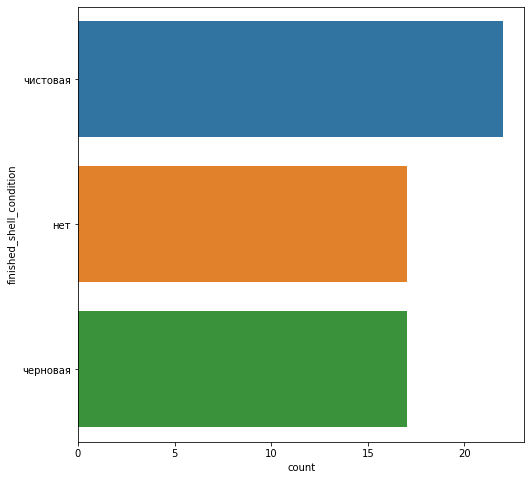

In [13]:
# todo уточнить, гистограммы каких именно признаков нужно строить УДАЛИТЬ
# гистограмма столбца с пропущенными значениями
plt.figure(figsize=(8,8))
sns.countplot(y='finished_shell_condition', data=df)

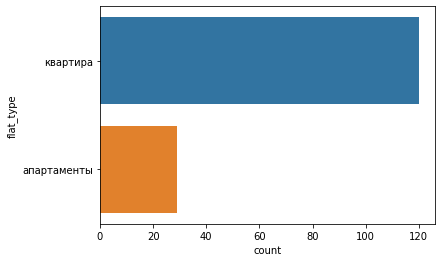

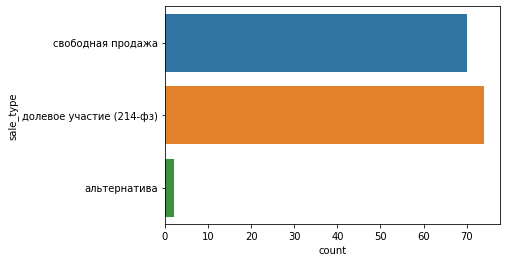

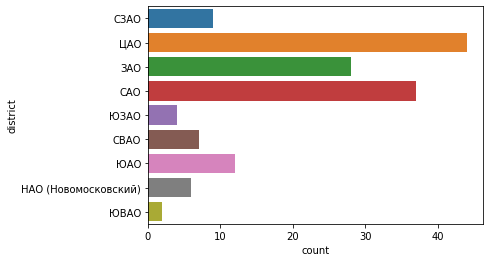

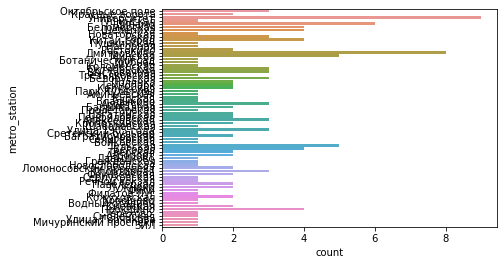

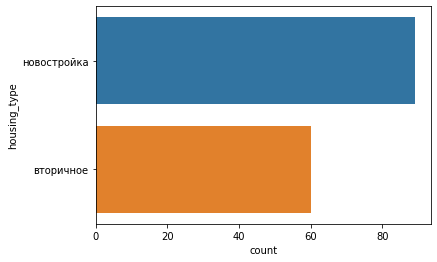

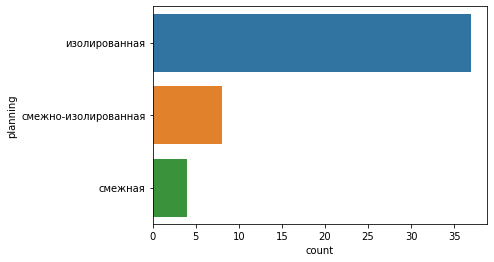

In [14]:
# когда в столбцах не будет 10_000 уникальных значений, построить все графики
categorical_features = df.dtypes[df.dtypes == 'object'].index
categorical_features_not_unique = [categorical_features[0], categorical_features[1], categorical_features[3], categorical_features[4],  categorical_features[6], categorical_features[7]]
for feature in categorical_features_not_unique:
    sns.countplot(y=feature, data=df)
    plt.show()

ВЫВОД 'exterior_walls' and 'roof' suffer from sparse classes.

4. Сигментация

<AxesSubplot:xlabel='price', ylabel='flat_type'>

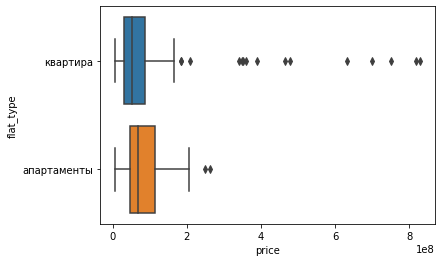

In [15]:
# коробчатая диаграмма цены в зависимости от типа квартиры/собственности
sns.boxplot(x = 'price', y = 'flat_type', data= df)

In [16]:
# сигментация по типу собсвенности и отображение средних значений для каждого типа
df.groupby('flat_type').mean()

,rooms,price,mortgage,area,living_area,kitchen_area,floor,floors,built_year,ceiling_height,building_number,entrance_number
flat_type,,,,,,,,,,,,
апартаменты,2.103448,8.842730e+07,0.517241,134.715862,58.200000,16.891667,10.793103,15.931034,2019.035714,3.154000,1.333333,5.0
квартира,2.616667,1.065675e+08,0.466667,129.759500,71.515476,19.065823,12.991667,23.583333,2013.426087,3.116267,11.948276,5.8


<AxesSubplot:xlabel='area', ylabel='flat_type'>

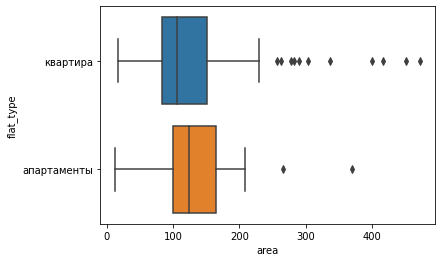

In [17]:
# коробчатая диаграмма плащади в зависимости от типа квартиры/собственности
sns.boxplot(x='area', y='flat_type', data=df)

In [18]:
# сигментация по типу собсвенности и отображение средних значений и среднеквадратических отклонений для каждого типа
df.groupby('flat_type').agg([np.mean, np.std])

C:\Temp/ipykernel_1444/95852824.py:2: FutureWarning: ['sale_type', 'address', 'district', 'metro_station', 'seller', 'housing_type', 'planning', 'bathroom', 'balcony_loggia', 'repair', 'view', 'finished_shell_condition', 'house_type', 'house_class', 'parking', 'elevators', 'housing_line', 'floor_type', 'heating', 'unsafe_house', 'garbage_disposal', 'gas_supply', 'description_text'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  df.groupby('flat_type').agg([np.mean, np.std])


rooms                   price                mortgage  \
                 mean       std          mean           std      mean   
flat_type                                                               
апартаменты  2.103448  1.654967  8.842730e+07  6.468781e+07  0.517241   
квартира     2.616667  1.625342  1.065675e+08  1.610288e+08  0.466667   

                             area            living_area             ...  \
                  std        mean        std        mean        std  ...   
flat_type                                                            ...   
апартаменты  0.508548  134.715862  73.539387   58.200000  37.967014  ...   
квартира     0.500979  129.759500  82.418588   71.515476  47.667648  ...   

                floors              built_year            ceiling_height  \
                  mean        std         mean        std           mean   
flat_type                                                                  
апартаменты  15.931034  14.096431  2019.035714   5.044118       3.154000   
квартира     23.583333  15.294083  2013.426087  23.515229       3.116267   

                      building_number            entrance_number            
                  std            mean        std            mean       std  
flat_type                                                                   
апартаменты  0.321189        1.333333   1.000000             5.0       NaN  
квартира     0.291394       11.948276  17.914438             5.8  3.983791  

[2 rows x 24 columns]

5. Исследование корреции

In [19]:
# определение коэффициентов корреляции для числовых данных
correlations = df.corr()
print(correlations)

                    rooms     price  mortgage      area  living_area  \
rooms            1.000000 -0.162556 -0.104451 -0.323969    -0.235347   
price           -0.162556  1.000000  0.076202  0.697730     0.512876   
mortgage        -0.104451  0.076202  1.000000 -0.065376    -0.077533   
area            -0.323969  0.697730 -0.065376  1.000000     0.774670   
living_area     -0.235347  0.512876 -0.077533  0.774670     1.000000   
kitchen_area    -0.083701  0.466173 -0.149518  0.533555     0.163922   
floor           -0.059302 -0.081794  0.051299  0.078908     0.133540   
floors           0.046491 -0.247927  0.004688 -0.101607     0.068717   
built_year       0.233406 -0.023978 -0.105255 -0.045822    -0.109127   
ceiling_height   0.083930  0.441147 -0.213957  0.346714     0.213012   
building_number  0.148250 -0.158353  0.210201 -0.188105    -0.246169   
entrance_number  0.431606 -0.396724 -0.569214 -0.285741    -0.120000   

                 kitchen_area     floor    floors  built_year  

In [20]:
from matplotlib.colors import ListedColormap

C:\Temp/ipykernel_1444/2365110869.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(correlations, dtype=np.bool)


<AxesSubplot:>

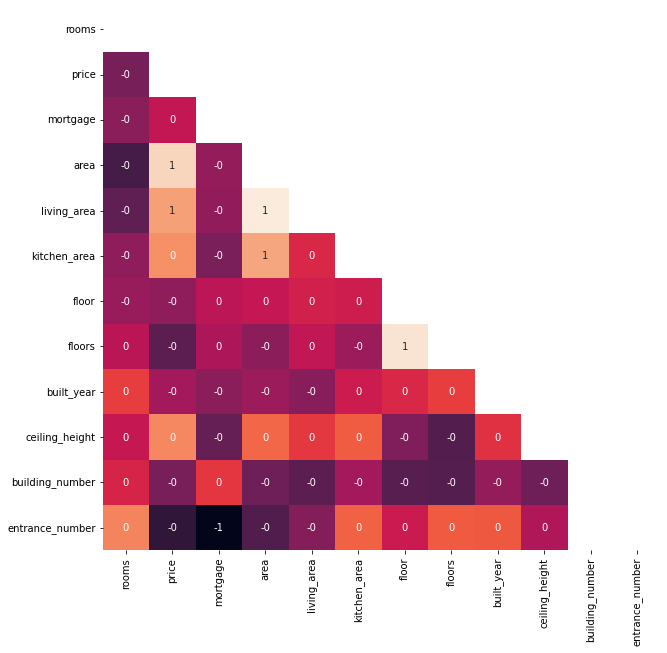

In [21]:
# тепловая карта коэффициентов корреляции числовых признаков
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,10))
sns.heatmap(correlations, annot=True, fmt='.0f', cbar=False, mask = mask)
# with sns.axes_style("white"):
#     ax = sns.heatmap(correlations, mask=mask, fmt='.0f', annot=True, lw=1, cmap=ListedColormap(['green', 'yellow', 'red','blue']))